# Test réseaux de neurones

In [415]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, RMSprop

> On importe les données, le df4_transformed donne les meilleurs résulats

In [2]:
df2 = pd.read_pickle("../Création du Dataset/datasetv4_fillmissing.pkl")
df4 = pd.read_pickle("../Création du Dataset/datasetv4_transformed.pkl")

In [94]:
y = df2["Y"].to_numpy().astype('int')

In [416]:
X = df4.to_numpy().astype('float32')
X.shape

(2886, 88)

> Sans strandardisation le modèle ne converge pas

In [417]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [420]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2, random_state=1)


### Test d'un premier modèle à architecture simple

In [424]:
from keras import regularizers

model_simple = Sequential()
model_simple.add(Dense(10, input_dim=88, activation='relu'))
model_simple.add(Dense(1, activation='sigmoid'))


model_simple.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [425]:
history = model_simple.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_test, y_test))


Epoch 1/100
116/116 [==============================] - 3s 6ms/step - loss: 0.7236 - accuracy: 0.5446 - val_loss: 0.6603 - val_accuracy: 0.6073
Epoch 2/100
116/116 [==============================] - 0s 4ms/step - loss: 0.6407 - accuracy: 0.6421 - val_loss: 0.6266 - val_accuracy: 0.6592
Epoch 3/100
116/116 [==============================] - 0s 4ms/step - loss: 0.6072 - accuracy: 0.6755 - val_loss: 0.6127 - val_accuracy: 0.6609
Epoch 4/100
116/116 [==============================] - 1s 5ms/step - loss: 0.5880 - accuracy: 0.6893 - val_loss: 0.6064 - val_accuracy: 0.6678
Epoch 5/100
116/116 [==============================] - 0s 4ms/step - loss: 0.5753 - accuracy: 0.7028 - val_loss: 0.6054 - val_accuracy: 0.6626
Epoch 6/100
116/116 [==============================] - 1s 5ms/step - loss: 0.5647 - accuracy: 0.7084 - val_loss: 0.6043 - val_accuracy: 0.6678
Epoch 7/100
116/116 [==============================] - 0s 4ms/step - loss: 0.5577 - accuracy: 0.7149 - val_loss: 0.6012 - val_accuracy: 0.6557

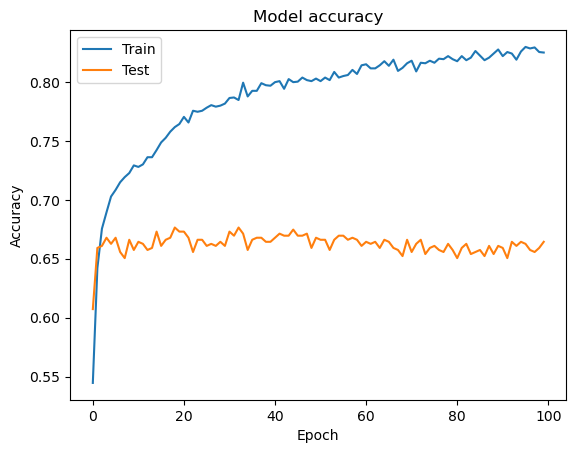

In [426]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

> Pour éviter l'overfitting on peut utiliser la régularisation L1

In [427]:
from keras import regularizers

model_simple_regu = Sequential()
model_simple_regu.add(Dense(10, input_dim=88, activation='relu',kernel_regularizer=regularizers.l1(0.004)))
model_simple_regu.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1(0.004)))


model_simple_regu.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [431]:
history = model_simple_regu.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/100
116/116 [==============================] - 2s 6ms/step - loss: 1.0982 - accuracy: 0.5685 - val_loss: 1.0292 - val_accuracy: 0.5865
Epoch 2/100
116/116 [==============================] - 1s 4ms/step - loss: 0.9521 - accuracy: 0.6451 - val_loss: 0.9397 - val_accuracy: 0.6055
Epoch 3/100
116/116 [==============================] - 1s 8ms/step - loss: 0.8722 - accuracy: 0.6737 - val_loss: 0.8850 - val_accuracy: 0.6176
Epoch 4/100
116/116 [==============================] - 1s 5ms/step - loss: 0.8176 - accuracy: 0.6828 - val_loss: 0.8386 - val_accuracy: 0.6125
Epoch 5/100
116/116 [==============================] - 0s 3ms/step - loss: 0.7758 - accuracy: 0.6885 - val_loss: 0.8023 - val_accuracy: 0.6176
Epoch 6/100
116/116 [==============================] - 0s 2ms/step - loss: 0.7436 - accuracy: 0.7032 - val_loss: 0.7781 - val_accuracy: 0.6125
Epoch 7/100
116/116 [==============================] - 1s 7ms/step - loss: 0.7198 - accuracy: 0.7023 - val_loss: 0.7544 - val_accuracy: 0.6194

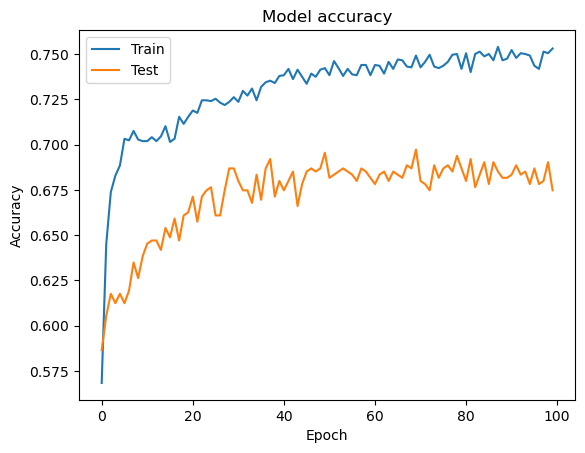

In [432]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Test d'un modèle en "entonnoir"

In [421]:
from keras import regularizers

model_ento = Sequential()
model_ento.add(Dense(44, input_dim=88, activation='relu',kernel_regularizer=regularizers.l1(0.004)))
model_ento.add(Dense(22, activation='relu',kernel_regularizer=regularizers.l1(0.004)))
model_ento.add(Dense(11, activation='relu',kernel_regularizer=regularizers.l1(0.004)))
model_ento.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1(0.004)))


model_ento.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [422]:
history2 = model_ento.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/100
116/116 [==============================] - 6s 15ms/step - loss: 2.6620 - accuracy: 0.5676 - val_loss: 2.1658 - val_accuracy: 0.6280
Epoch 2/100
116/116 [==============================] - 1s 6ms/step - loss: 1.7754 - accuracy: 0.6594 - val_loss: 1.4491 - val_accuracy: 0.6384
Epoch 3/100
116/116 [==============================] - 1s 7ms/step - loss: 1.2147 - accuracy: 0.6612 - val_loss: 1.0616 - val_accuracy: 0.6471
Epoch 4/100
116/116 [==============================] - 1s 10ms/step - loss: 0.9440 - accuracy: 0.6828 - val_loss: 0.8961 - val_accuracy: 0.6401
Epoch 5/100
116/116 [==============================] - 1s 8ms/step - loss: 0.8316 - accuracy: 0.6798 - val_loss: 0.8262 - val_accuracy: 0.6557
Epoch 6/100
116/116 [==============================] - 1s 5ms/step - loss: 0.7802 - accuracy: 0.6867 - val_loss: 0.7831 - val_accuracy: 0.6557
Epoch 7/100
116/116 [==============================] - 1s 6ms/step - loss: 0.7476 - accuracy: 0.6963 - val_loss: 0.7677 - val_accuracy: 0.65

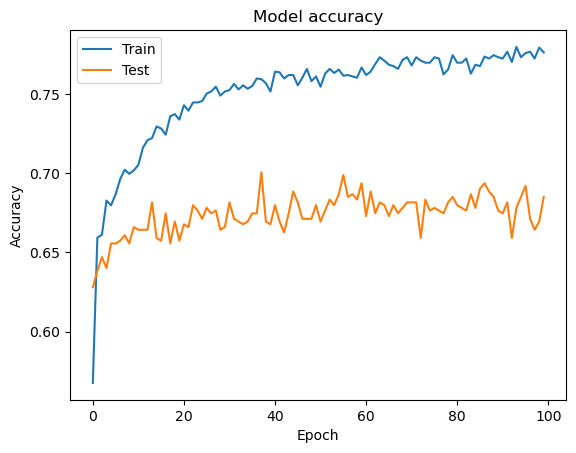

In [423]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Conclusion

> Beaucoup de variance car assez peu de données mais en moyenne on atteint les 67% de précision

> La régularisation L1 permet de moins se préoccuper de l'overfitting

> Pas de réelle amélioration entre un modèle simple et un autre avec des couches cachées

=> Pour améliorer significativement les résultats il faudrait avoir plus de données